<a href="https://colab.research.google.com/github/Garyzhao231/g_ai_project/blob/main/Sematic_graph_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import zipfile

folder_path = "/content/"
df = None

# Iterate through the contents of the folder
for filename in os.listdir(folder_path):
    full_path = os.path.join(folder_path, filename)

    # Check if the current item is a ZIP file
    if filename.endswith(".zip"):
        print(f"Extracting {full_path}...")

        # Extract the ZIP file
        with zipfile.ZipFile(full_path, 'r') as zip_ref:
            zip_ref.extractall(folder_path)  # Extract files to the folder

    # Check if the current item is a CSV file
    elif filename.endswith(".csv"):
        print(full_path)
        temp_df = pd.read_csv(full_path, skipinitialspace=True)

        # Concatenate the DataFrame
        if df is None:
            df = temp_df
        else:
            df = pd.concat([df, temp_df], ignore_index=True)

# Now, df should contain all concatenated CSV files


Extracting /content/C_78DM8fG6E.zip...


In [ ]:
import os
import pandas as pd
import zipfile
from bs4 import BeautifulSoup
import re

folder_path = "/content/"
df = None

# Iterate through the contents of the folder
for filename in os.listdir(folder_path):
    full_path = os.path.join(folder_path, filename)

    # Check if the current item is a ZIP file
    if filename.endswith(".zip"):
        print(f"Extracting {full_path}...")

        # Extract the ZIP file
        with zipfile.ZipFile(full_path, 'r') as zip_ref:
            zip_ref.extractall(folder_path)  # Extract files to the folder

    # Check if the current item is a CSV file
    elif filename.endswith(".csv"):
        print(f"Reading {full_path}")
        temp_df = pd.read_csv(full_path, skipinitialspace=True)

        # Concatenate the DataFrame
        if df is None:
            df = temp_df
        else:
            df = pd.concat([df, temp_df], ignore_index=True)

# Check if df is initialized properly
if df is None:
    print("No CSV files found.")
else:
    print(df.head())  # Print the first few rows to inspect

    # Now proceed with cleaning and processing
    df['Comment'] = df['Comment'].fillna('')

    def clean_text(text):
        # Remove HTML tags
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text()

        # Remove special ASCII symbols
        text = re.sub(r'[^\x00-\x7F]+', '', text)

        # Remove asterisks around each letter in the phrase and words attached to @
        text = re.sub(r'\*|@\w+|@|\?|!', '', text)

        return text.strip()

    # Apply clean_text function to all rows
    df['clean_comment'] = df['Comment'].apply(lambda x: clean_text(x))

    # Define a function to filter sentences with less than 10 words
    def filter_sentences(text):
        sentences = text.split('.')
        filtered_sentences = [sentence for sentence in sentences if len(sentence.split()) >= 10]
        return '. '.join(filtered_sentences)

    # Apply the filter_sentences function to 'clean_comment' column
    df['clean_comment'] = df['clean_comment'].apply(filter_sentences)

    # Function to filter out rows with empty 'clean_comment' values
    def filter_empty_comments(row):
        return row['clean_comment'].strip() != ''

    # Apply the filter function to remove rows with empty 'clean_comment'
    df = df[df.apply(filter_empty_comments, axis=1)]


Reading /content/USsh-XK6s6U.csv
Reading /content/VzUmLAUPSQo.csv
Reading /content/WY518YRfs5M.csv
Reading /content/SVcsDDABEkM.csv
Reading /content/Yd0yQ9yxSYY.csv
Reading /content/XKMvk5hWDfo.csv
Reading /content/cqc0xni25n0.csv
Reading /content/xoVJKj8lcNQ.csv
Reading /content/880TBXMuzmk.csv
Reading /content/_x9AwxfjxvE.csv
Reading /content/uJnhh7YSr5Q.csv
Extracting /content/C_78DM8fG6E.zip...
Reading /content/eXdVDhOGqoE.csv
Reading /content/aZ5EsdnpLMI.csv
Reading /content/hJP5GqnTrNo.csv
Reading /content/LWiM-LuRe6w.csv
Reading /content/vJefOB8kec8.csv
Reading /content/540vzMlf-54.csv
Reading /content/gMsQO5u7-NQ.csv
Reading /content/b76gsOSkHB4.csv
Reading /content/RdAQnkDzGvc.csv
Reading /content/rb7NddXDdxs.csv
Reading /content/qrvK_KuIeJk.csv
Reading /content/2yd18z6iSyk.csv
Reading /content/-qReeg7imGc.csv
Reading /content/Tpq3hRt0pmw.csv
Reading /content/C_78DM8fG6E.csv
    Comment Type                                            Comment  \
0   Main Comment  Edit: RIP my i

In [ ]:
pip install yake wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.8 MB/s eta 0:00:00


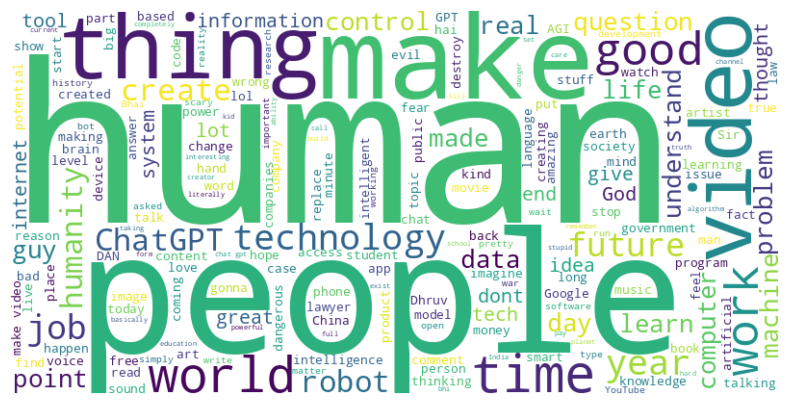

In [ ]:

import yake
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# YAKE keyword extraction model
def extract_keywords(texts, max_ngram_size=1, num_of_keywords=20, language="en"):
    kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=num_of_keywords)

    # Extract keywords for each comment
    keywords = []
    for text in texts:
        extracted_keywords = kw_extractor.extract_keywords(text)
        for kw, score in extracted_keywords:
            keywords.append(kw)
    return keywords

# Function to generate a word cloud from a list of keywords
def generate_wordcloud(keywords):
    text = " ".join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Ensure df is not None and contains 'clean_comment' column
if df is not None and 'clean_comment' in df.columns:
    # Extract comments from the 'clean_comment' column
    comments = df['clean_comment'].tolist()

    # Extract keywords using YAKE model
    keywords = extract_keywords(comments, max_ngram_size=1, num_of_keywords=20)

    # Generate and display the word cloud
    generate_wordcloud(keywords)
else:
    print("DataFrame is empty or 'clean_comment' column not found.")


Extracted Keywords with Frequencies:
people: 4344
human: 2962
video: 2888
make: 2813
humans: 2291
world: 2126
time: 2113
good: 1759
things: 1531
technology: 1531


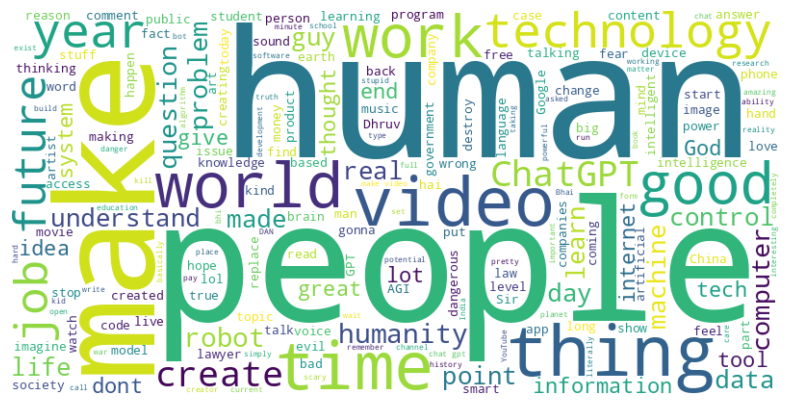

In [ ]:
import pandas as pd
import yake
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Load your dataset (Uncomment if reading from a CSV)
# df = pd.read_csv("your_file.csv")

# YAKE keyword extraction model
def extract_keywords(texts, max_ngram_size=1, num_of_keywords=20, language="en"):
    kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, top=num_of_keywords)

    # Extract keywords for each comment and store them in a list
    keywords = []
    for text in texts:
        extracted_keywords = kw_extractor.extract_keywords(text)
        for kw, _ in extracted_keywords:  # Ignore the score
            keywords.append(kw)
    return keywords

# Function to generate a word cloud from a list of keywords
def generate_wordcloud(keywords):
    text = " ".join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Function to calculate frequency of keywords
def calculate_keyword_frequency(keywords):
    return Counter(keywords)

# Ensure df is properly loaded and contains 'clean_comment' column
try:
    if 'clean_comment' in df.columns:
        # Extract comments
        comments = df['clean_comment'].dropna().tolist()  # Drop NaN values

        # Extract keywords using YAKE model
        keywords = extract_keywords(comments, max_ngram_size=1, num_of_keywords=20)

        # Calculate keyword frequency
        keyword_frequency = calculate_keyword_frequency(keywords)

        # Print extracted keywords with their frequencies
        print("Extracted Keywords with Frequencies:")
        for kw, freq in keyword_frequency.most_common(10):  # Show top 10
            print(f"{kw}: {freq}")

        # Generate and display word cloud
        generate_wordcloud(keywords)

    else:
        print("Error: 'clean_comment' column not found in DataFrame.")

except Exception as e:
    print(f"An error occurred: {e}")
